# P1 - Identificando personas desde una imagen de su cara

### MODELO 4 - SVM SUPPORT VECTOR MACHINE


Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import preprocessing
from keras import backend as K
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_pairs
from sklearn import svm

from PIL import Image
import random

import tensorflow as tf
import tensorflow_datasets as tfds
tf.test.gpu_device_name()

import warnings
warnings.filterwarnings('ignore')

In [46]:
# DataSet : “Labeled Faces in the Wild”
# número mínimo de fotos por personaje para filtrar la base

# con 10 mín  fotos se generan 158 categorías
# con 20 mín  fotos se generan 62 categorías (sugerido profesor)
# con 30 mín  fotos se generan 12 categorías
# con 40 mín  fotos se generan 19 categorías (sugerido paper Alejo)
# con 50 mín  fotos se generan 12 categorías
# con 60 mín  fotos se generan 8 categorías
# con 70 mín  fotos se generan 7 categorías (más común según paper Alejo)

In [91]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [92]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (62, 47)


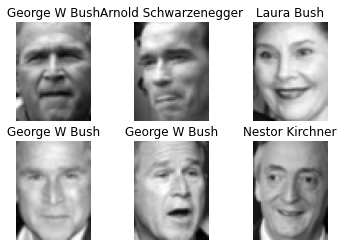

In [25]:
# Some examples
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_names[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

# A. min_faces_per_person = 20 / resize=0.5

In [50]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [51]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (62, 47)


In [52]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
61.15702479338842
RBF SVM
61.32231404958678
Quadratic SVM
60.66115702479339


In [54]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

         Alejandro Toledo       0.43      0.30      0.35        10
             Alvaro Uribe       0.71      0.62      0.67         8
          Amelie Mauresmo       0.50      0.25      0.33         4
             Andre Agassi       0.40      0.33      0.36         6
           Angelina Jolie       1.00      0.50      0.67         4
             Ariel Sharon       0.55      0.67      0.60        18
    Arnold Schwarzenegger       0.00      0.00      0.00         3
     Atal Bihari Vajpayee       1.00      0.43      0.60         7
             Bill Clinton       0.25      0.33      0.29         6
             Carlos Menem       1.00      0.50      0.67         6
             Colin Powell       0.62      0.86      0.72        50
            David Beckham       0.75      0.38      0.50         8
          Donald Rumsfeld       0.66      0.79      0.72        24
         George Robertson       0.50      0.67    

                           precision    recall  f1-score   support

         Alejandro Toledo       0.43      0.30      0.35        10
             Alvaro Uribe       0.71      0.62      0.67         8
          Amelie Mauresmo       0.50      0.50      0.50         4
             Andre Agassi       0.40      0.33      0.36         6
           Angelina Jolie       1.00      0.50      0.67         4
             Ariel Sharon       0.50      0.67      0.57        18
    Arnold Schwarzenegger       0.00      0.00      0.00         3
     Atal Bihari Vajpayee       0.75      0.43      0.55         7
             Bill Clinton       0.29      0.33      0.31         6
             Carlos Menem       0.67      0.33      0.44         6
             Colin Powell       0.64      0.86      0.74        50
            David Beckham       0.75      0.38      0.50         8
          Donald Rumsfeld       0.61      0.79      0.69        24
         George Robertson       0.50      0.67      0.57     

Linear SVM


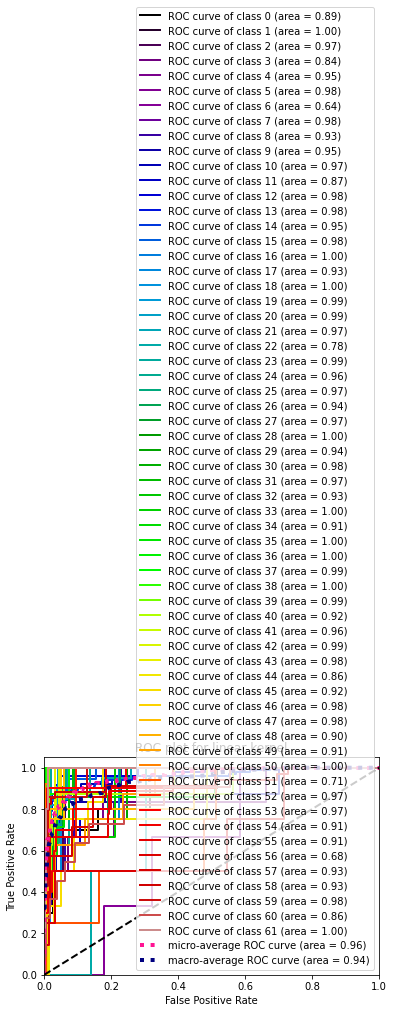

RBF SVM


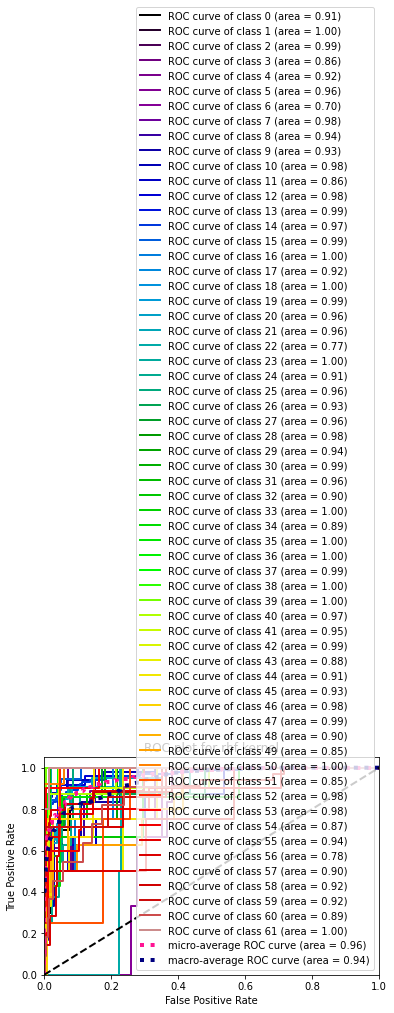

Quadratic SVM


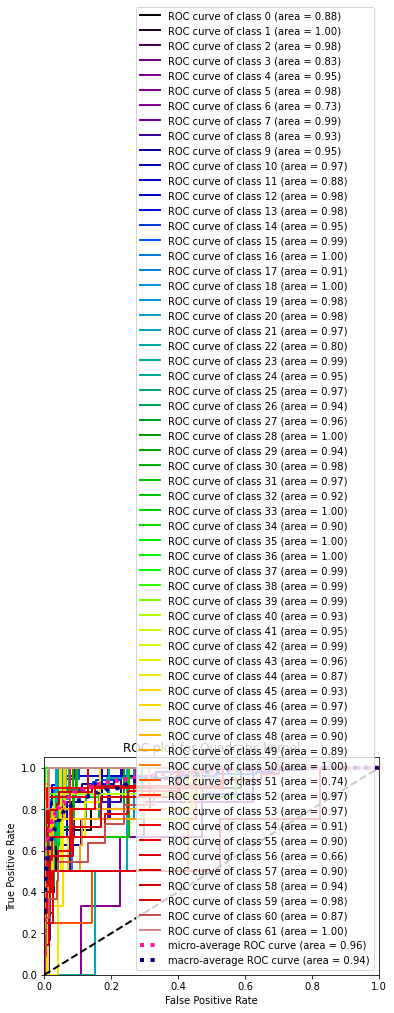

In [55]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# B. min_faces_per_person = 20 / resize=0.7

In [15]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [16]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (87, 65)


In [17]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
62.47933884297521
RBF SVM
58.67768595041323
Quadratic SVM
62.314049586776854


In [19]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

         Alejandro Toledo       0.78      0.70      0.74        10
             Alvaro Uribe       0.60      0.50      0.55         6
          Amelie Mauresmo       0.50      0.60      0.55         5
             Andre Agassi       0.67      0.44      0.53         9
           Angelina Jolie       0.25      0.25      0.25         4
             Ariel Sharon       0.65      0.79      0.71        19
    Arnold Schwarzenegger       0.50      0.44      0.47         9
     Atal Bihari Vajpayee       0.20      0.17      0.18         6
             Bill Clinton       0.20      0.50      0.29         2
             Carlos Menem       0.67      0.40      0.50         5
             Colin Powell       0.77      0.81      0.79        54
            David Beckham       0.20      0.33      0.25         3
          Donald Rumsfeld       0.55      0.65      0.59        17
         George Robertson       1.00      0.50    

                           precision    recall  f1-score   support

         Alejandro Toledo       0.70      0.70      0.70        10
             Alvaro Uribe       0.40      0.33      0.36         6
          Amelie Mauresmo       0.60      0.60      0.60         5
             Andre Agassi       0.80      0.44      0.57         9
           Angelina Jolie       0.25      0.25      0.25         4
             Ariel Sharon       0.62      0.68      0.65        19
    Arnold Schwarzenegger       0.40      0.22      0.29         9
     Atal Bihari Vajpayee       0.33      0.17      0.22         6
             Bill Clinton       0.29      1.00      0.44         2
             Carlos Menem       0.67      0.40      0.50         5
             Colin Powell       0.80      0.83      0.82        54
            David Beckham       0.14      0.33      0.20         3
          Donald Rumsfeld       0.61      0.65      0.63        17
         George Robertson       0.00      0.00      0.00     

Linear SVM


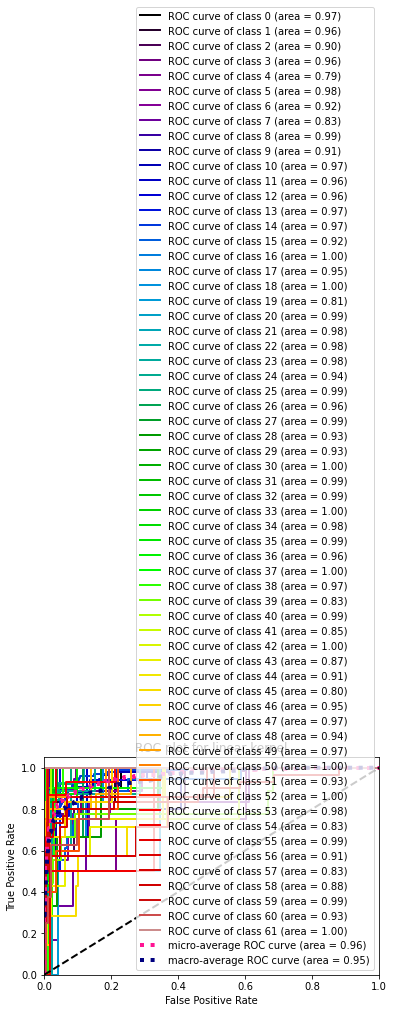

RBF SVM


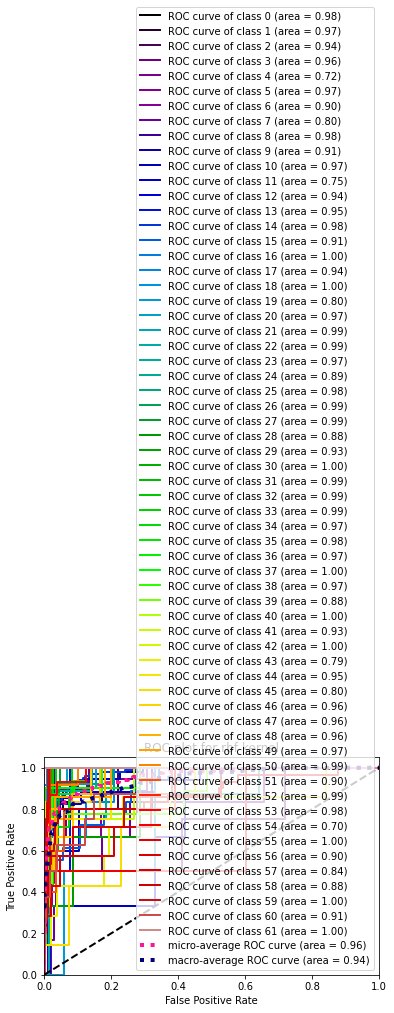

Quadratic SVM


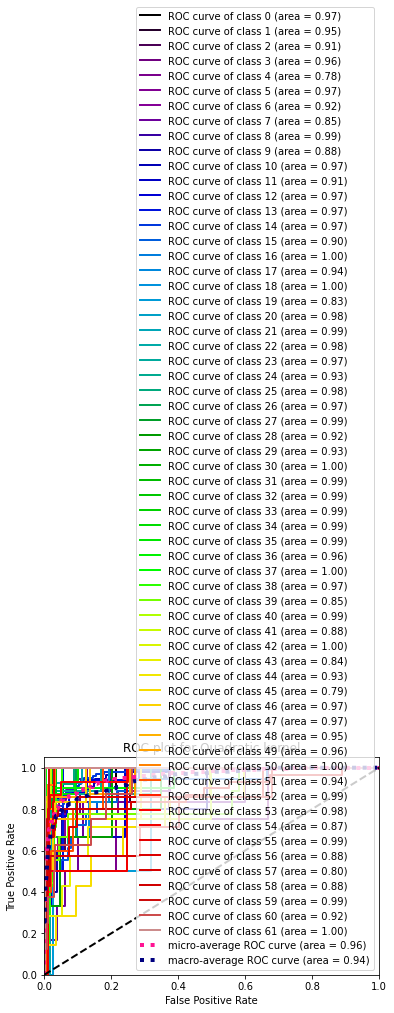

In [20]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# C. min_faces_per_person = 40 / resize=0.5

In [21]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [22]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


In [23]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
73.52941176470588
RBF SVM
73.79679144385027
Quadratic SVM
75.40106951871658


In [25]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

             Ariel Sharon       0.50      0.62      0.55        13
    Arnold Schwarzenegger       0.40      0.67      0.50         6
             Colin Powell       0.80      0.71      0.75        45
          Donald Rumsfeld       0.77      0.71      0.74        28
            George W Bush       0.75      0.86      0.81        96
        Gerhard Schroeder       0.65      0.71      0.68        24
  Gloria Macapagal Arroyo       1.00      1.00      1.00         6
              Hugo Chavez       0.79      0.73      0.76        15
           Jacques Chirac       0.75      0.55      0.63        11
            Jean Chretien       0.80      0.62      0.70        13
        Jennifer Capriati       0.86      0.60      0.71        10
            John Ashcroft       1.00      0.67      0.80        15
        Junichiro Koizumi       0.70      1.00      0.82         7
               Laura Bush       0.60      0.60    

Linear SVM


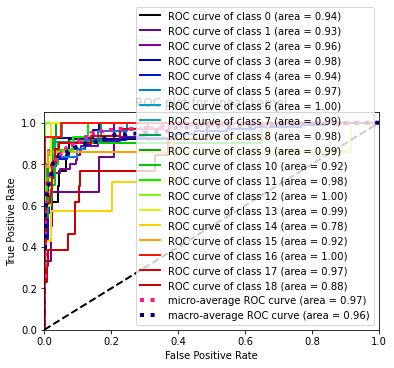

RBF SVM


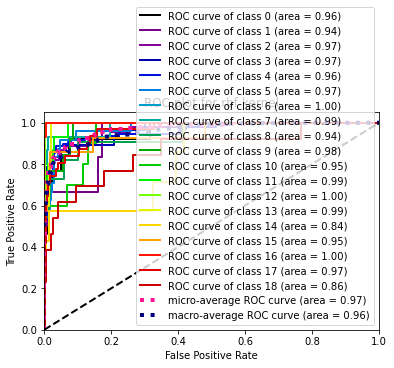

Quadratic SVM


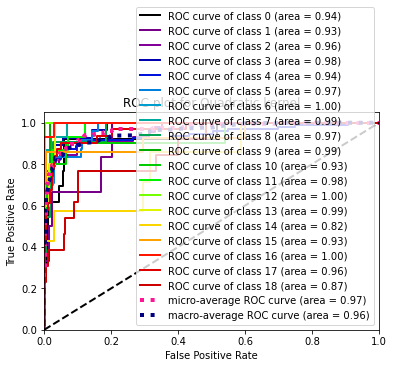

In [26]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# D. min_faces_per_person = 40 / resize=0.7

In [27]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [28]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (87, 65)


In [29]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
75.40106951871658
RBF SVM
72.99465240641712
Quadratic SVM
74.06417112299465


In [31]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

             Ariel Sharon       0.59      0.77      0.67        13
    Arnold Schwarzenegger       0.50      0.43      0.46         7
             Colin Powell       0.78      0.88      0.82        40
          Donald Rumsfeld       0.70      0.68      0.69        28
            George W Bush       0.83      0.90      0.86       110
        Gerhard Schroeder       0.72      0.75      0.73        24
  Gloria Macapagal Arroyo       1.00      0.75      0.86         4
              Hugo Chavez       0.75      0.75      0.75        12
           Jacques Chirac       0.50      0.67      0.57         6
            Jean Chretien       0.89      0.57      0.70        14
        Jennifer Capriati       0.90      0.56      0.69        16
            John Ashcroft       0.62      0.45      0.53        11
        Junichiro Koizumi       0.64      0.64      0.64        14
               Laura Bush       1.00      0.78    

Linear SVM


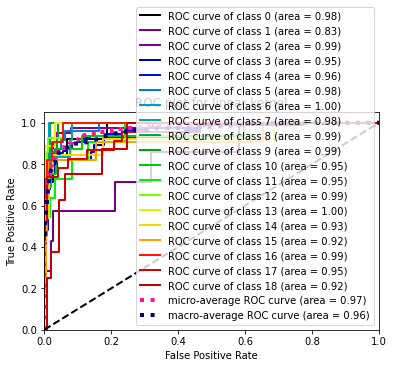

RBF SVM


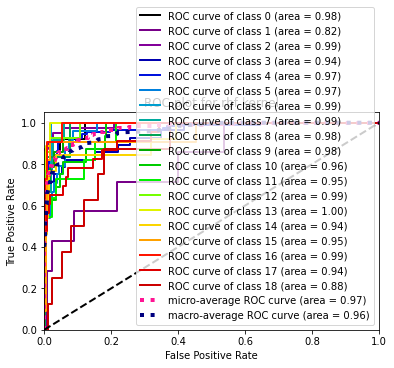

Quadratic SVM


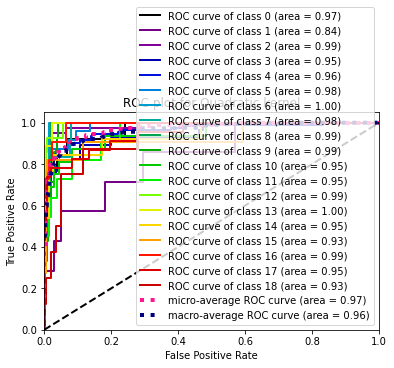

In [32]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# E. min_faces_per_person = 60 / resize=0.5

In [5]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [6]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (62, 47)


In [7]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
82.22222222222221
RBF SVM
79.25925925925927
Quadratic SVM
82.96296296296296


In [9]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.50      0.53        16
     Colin Powell       0.83      0.82      0.83        55
  Donald Rumsfeld       0.78      0.72      0.75        25
    George W Bush       0.90      0.92      0.91       105
Gerhard Schroeder       0.88      0.71      0.79        21
      Hugo Chavez       0.71      0.62      0.67         8
Junichiro Koizumi       0.73      0.89      0.80         9
       Tony Blair       0.72      0.84      0.78        31

         accuracy                           0.82       270
        macro avg       0.77      0.75      0.76       270
     weighted avg       0.82      0.82      0.82       270

RBF SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.38      0.46        16
     Colin Powell       0.81      0.84      0.82        55
  Donald Rumsfeld       0.89      0.64      0.74        25
    George W Bush       0.80     

Linear SVM


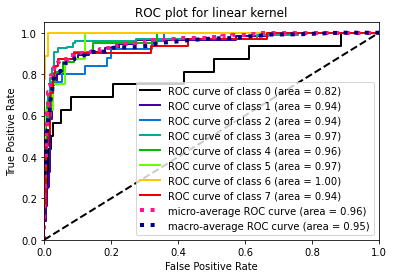

RBF SVM


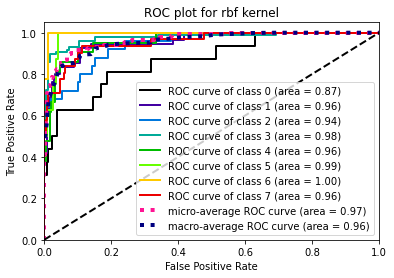

Quadratic SVM


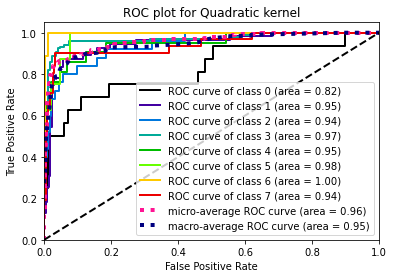

In [10]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# F. min_faces_per_person = 60 / resize=0.7

In [11]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [12]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (87, 65)


In [13]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
82.5925925925926
RBF SVM
81.11111111111111
Quadratic SVM
83.7037037037037


In [15]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.75      0.77        16
     Colin Powell       0.83      0.85      0.84        40
  Donald Rumsfeld       0.68      0.74      0.71        23
    George W Bush       0.90      0.90      0.90       110
Gerhard Schroeder       0.85      0.71      0.77        24
      Hugo Chavez       0.71      0.67      0.69        15
Junichiro Koizumi       0.83      0.91      0.87        11
       Tony Blair       0.73      0.77      0.75        31

         accuracy                           0.83       270
        macro avg       0.79      0.79      0.79       270
     weighted avg       0.83      0.83      0.83       270

RBF SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.50      0.64        16
     Colin Powell       0.83      0.88      0.85        40
  Donald Rumsfeld       0.65      0.74      0.69        23
    George W Bush       0.85     

Linear SVM


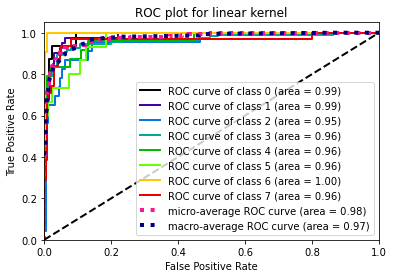

RBF SVM


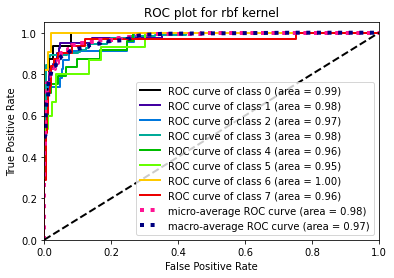

Quadratic SVM


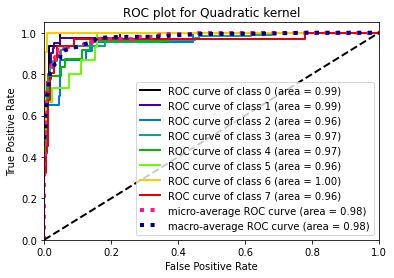

In [16]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# G. min_faces_per_person = 60 / resize=0.5

In [93]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [94]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (87, 65)


In [95]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [96]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
82.5925925925926
RBF SVM
79.62962962962963
Quadratic SVM
81.11111111111111


In [97]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.85      0.83        20
     Colin Powell       0.80      0.83      0.82        48
  Donald Rumsfeld       0.69      0.83      0.75        24
    George W Bush       0.88      0.89      0.89       102
Gerhard Schroeder       0.69      0.78      0.73        23
      Hugo Chavez       1.00      0.68      0.81        19
Junichiro Koizumi       0.80      0.80      0.80         5
       Tony Blair       0.87      0.69      0.77        29

         accuracy                           0.83       270
        macro avg       0.82      0.80      0.80       270
     weighted avg       0.83      0.83      0.83       270

RBF SVM
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.80      0.89        20
     Colin Powell       0.76      0.92      0.83        48
  Donald Rumsfeld       0.85      0.71      0.77        24
    George W Bush       0.79     

Linear SVM


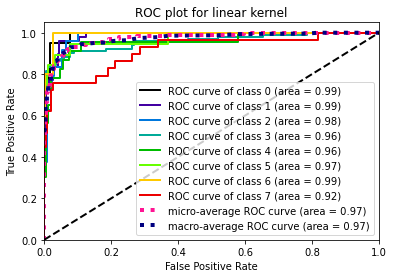

RBF SVM


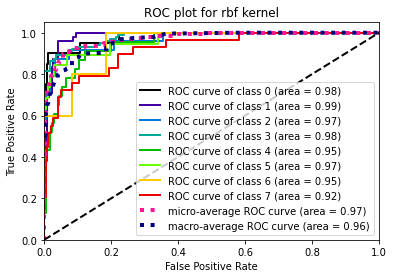

Quadratic SVM


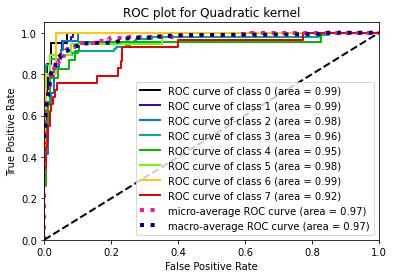

In [98]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# PCA con RBF SVM 

In [99]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes

In [100]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (87, 65)


In [101]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [102]:
#preprocess the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data_X)
X_train = scaler.transform(training_data_X)
X_test = scaler.transform(testing_data_X)

from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(training_data_X)
train_img = pca.transform(training_data_X)
test_img = pca.transform(testing_data_X)


In [103]:
# Tunning - Linear SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='linear',class_weight='balanced'),param_grid)
clf=clf.fit(train_img,training_data_Y)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001, kernel='linear')


In [104]:
svm_linear=svm.SVC(kernel='linear',probability=True, gamma=0.0001,C=1000.0)
svm_linear=svm_linear.fit(train_img,training_data_Y)
print("Linear SVM")
print(svm_linear.score(test_img,testing_data_Y)*100)


Linear SVM
75.66844919786097


In [105]:
# Tunning - RBF SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced',probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001, probability=True)


In [106]:
svm_rbf=svm.SVC(kernel='rbf',probability=True, class_weight='balanced', gamma=0.0001,C=1000.0)
svm_rbf=svm_rbf.fit(train_img,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(test_img,testing_data_Y)*100)

RBF SVM
27.540106951871657


In [107]:
# Tunning - Quadratic SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='poly',degree=2, class_weight='balanced', probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', degree=2, gamma=0.0001, kernel='poly',
    probability=True)


In [108]:
svm_quad=svm.SVC(kernel='poly',degree=2,probability=True,class_weight='balanced', gamma=0.0001,C=1000.0)
svm_quad=svm_quad.fit(train_img,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(test_img,testing_data_Y)*100)

Quadratic SVM
58.288770053475936


### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    